In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"D:\ML_workspace\More_on_stocks\videos_&_data\data\MSFT-1Y-Hourly.csv")

In [2]:
df.head()

,date,open,high,low,close,volume,average,barCount
0,2019-08-07 14:30:00,133.80,133.83,131.82,132.89,35647,132.701,17523
1,2019-08-07 15:00:00,132.87,135.20,132.64,134.75,48757,134.043,26974
2,2019-08-07 16:00:00,134.74,134.92,133.52,133.88,28977,134.147,17853
3,2019-08-07 17:00:00,133.89,134.06,133.07,133.90,21670,133.618,13497
4,2019-08-07 18:00:00,133.89,135.24,133.83,134.83,22648,134.653,12602


In [3]:
df.set_index('date', drop=True, inplace=True)

In [4]:
df.head()

,open,high,low,close,volume,average,barCount
date,,,,,,,
2019-08-07 14:30:00,133.80,133.83,131.82,132.89,35647,132.701,17523
2019-08-07 15:00:00,132.87,135.20,132.64,134.75,48757,134.043,26974
2019-08-07 16:00:00,134.74,134.92,133.52,133.88,28977,134.147,17853
2019-08-07 17:00:00,133.89,134.06,133.07,133.90,21670,133.618,13497
2019-08-07 18:00:00,133.89,135.24,133.83,134.83,22648,134.653,12602


In [5]:
df = df[['close']] # dataframe.......

In [6]:
df.head()

,close
date,
2019-08-07 14:30:00,132.89
2019-08-07 15:00:00,134.75
2019-08-07 16:00:00,133.88
2019-08-07 17:00:00,133.90
2019-08-07 18:00:00,134.83


In [7]:
df1 = df['close'] # series.....

In [8]:
df1.head()

date
2019-08-07 14:30:00    132.89
2019-08-07 15:00:00    134.75
2019-08-07 16:00:00    133.88
2019-08-07 17:00:00    133.90
2019-08-07 18:00:00    134.83
Name: close, dtype: float64

In [9]:
type(df["close"])

pandas.core.series.Series

In [10]:
type(df[["close"]])

pandas.core.frame.DataFrame

In [11]:
df.describe()

,close
count,1753.000000
mean,164.330610
std,23.125225
min,132.670000
25%,143.320000
50%,159.750000
75%,183.390000
max,216.540000


In [12]:
df.shape

(1753, 1)

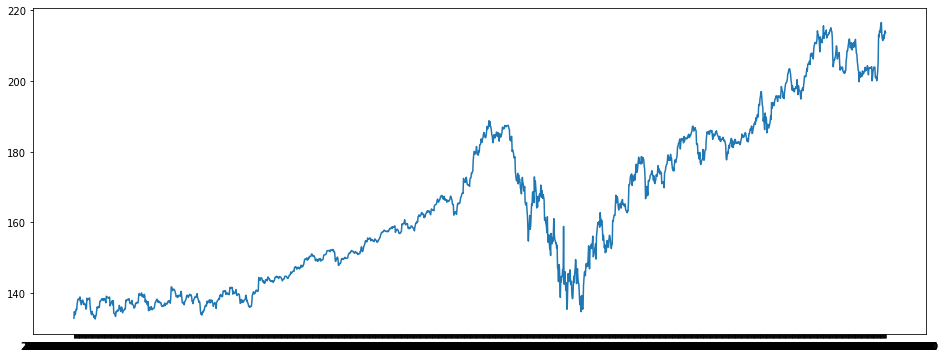

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.plot(df['close'])

### Returns

In [22]:
# percentage change---->pct_change(),,, (benefit of normalization as we can measure all variables in a comparable metric)

# we can even do normalization with min_max_scaler.

In [23]:
df['returns'] = df['close'].pct_change()

In [26]:
for i in df['returns']:
    print(i)

nan
0.013996538490480992
-0.006456400742115065
0.00014938751120419091
0.006945481702763212
0.00482088555959348
-0.0014762326542662185
0.011605558840922514
0.007014979905005436
0.003192801683477242
0.0005786618444847402
-0.0012289452757898722
0.00043427909669957465
0.004992041672695624
-0.00957454466921015
0.0015990696322139009
-0.007982583454281711
0.0051938551572787706
0.004220944618295697
0.00028987607797659187
-0.002463232630587564
-0.006391168567070893
0.0016811636576272715
0.00029188558085246896
-0.0017508024511234677
-0.0027769657994738406
-0.0074014363183352305
0.0026578073089702503
0.02017524482733246
-0.004330566582461337
0.0028271112722002556
-0.0008674280757554609
0.0006511358703515935
0.0018075338008820552
0.00028868360277134464
-0.01601731601731604
-0.009018917729872289
-0.005771365149833563
-0.0034233831956538285
0.006496900903592007
-0.0031161893456000955
-0.002828222685323234
-0.0015673981191220987
-0.004784331314943713
0.00405618568316668
-0.0008977332236101976
-0.0065

In [27]:
df.head()

,close,returns
date,,
2019-08-07 14:30:00,132.89,NaN
2019-08-07 15:00:00,134.75,0.013997
2019-08-07 16:00:00,133.88,-0.006456
2019-08-07 17:00:00,133.90,0.000149
2019-08-07 18:00:00,134.83,0.006945


In [30]:
(134.75 / 132.89  )-1 == df['returns'][1]  # it equals the first element and the asme for every stepp

True

In [32]:
(133.88 / 134.75) -1 == df['returns'][2]     # -0.006456

True

In [36]:
# for the first element ......
(132.89 / 0) -1 == np.nan

ZeroDivisionError: float division by zero

## Log_returns

In [ ]:
# here we are  using "approximate raw-log equality" because returns are very small.

# when returns are very small (common for trades with short holding durations), 
# the following approximation ensures they are close in value to raw returns.

In [37]:
df['log_returns'] = np.log(1 + df["returns"])

In [38]:
df.head()

,close,returns,log_returns
date,,,
2019-08-07 14:30:00,132.89,NaN,NaN
2019-08-07 15:00:00,134.75,0.013997,0.013899
2019-08-07 16:00:00,133.88,-0.006456,-0.006477
2019-08-07 17:00:00,133.90,0.000149,0.000149
2019-08-07 18:00:00,134.83,0.006945,0.006921


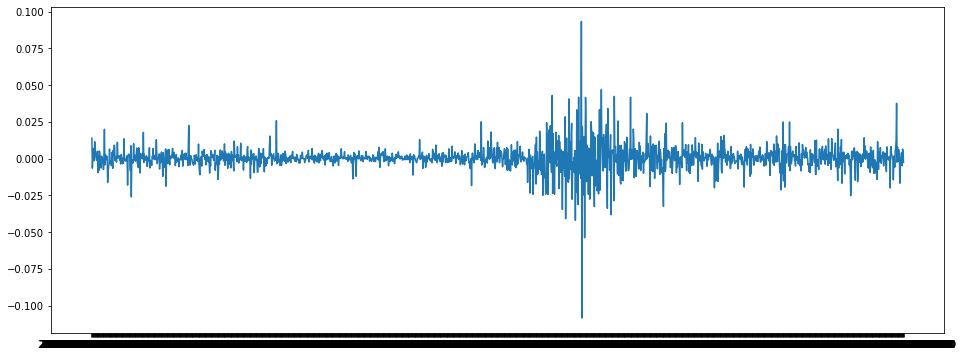

In [41]:
plt.figure(figsize = (16,6))
plt.plot(df['log_returns'])

In [42]:
df.shape


(1753, 3)

In [43]:
df.dropna(inplace=True)

In [44]:
df.shape

(1752, 3)

In [48]:
df['returns'].describe()


count    1752.000000
mean        0.000308
std         0.008543
min        -0.102738
25%        -0.002315
50%         0.000405
75%         0.002971
max         0.097789
Name: returns, dtype: float64

In [49]:
df['returns'].min(), df['returns'].max()

(-0.10273843248347492, 0.09778852798894277)

In [50]:
df['log_returns'].min(), df['log_returns'].max()

(-0.10840785684858545, 0.0932977270780871)

## minmaxscaling

In [51]:
X = df[['close','log_returns']]

In [52]:
X.head()

,close,log_returns
date,,
2019-08-07 15:00:00,134.75,0.013899
2019-08-07 16:00:00,133.88,-0.006477
2019-08-07 17:00:00,133.90,0.000149
2019-08-07 18:00:00,134.83,0.006921
2019-08-07 19:00:00,135.48,0.004809


In [53]:
from sklearn.preprocessing import MinMaxScaler



In [54]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

In [159]:
X_scaled.shape

(1752, 2)

In [56]:
X_scaled[:5]

array([[0.02480029, 0.6063657 ],
       [0.01442709, 0.50534309],
       [0.01466555, 0.53819647],
       [0.02575414, 0.57177063],
       [0.03350423, 0.56129908]])

In [66]:
y = []
for i in X_scaled:
    y.append(i[0])
    
# y = [x[0] for x in X_scaled]    

In [67]:
y[:5]

[0.024800286157148133,
 0.014427089543340932,
 0.014665553833313805,
 0.025754143317038736,
 0.033504232741147]

In [68]:
len(X_scaled)

1752

In [83]:
train_size = int(len(X_scaled)*0.8)
test_size = int(len(X_scaled)-train_size)


In [85]:
X_train = X_scaled[:train_size,:]
X_test = X_scaled[train_size:len(X_scaled),:]
y_train =  y[0:train_size]
y_test = y[train_size:len(X_scaled)]

In [89]:
len(X_test) + len(X_train)

1752

In [86]:
len(y_train) + len(y_test)

1752

In [95]:
# will raise an error if not equal.....
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

## Special Splitting step for stocks:

In [99]:
len(X_train)

1401

In [105]:
X_train.shape

(1401, 2)

In [117]:
len(y_train)

1401

In [106]:
n = 3
Xtrain = []
ytrain = []
Xtest = []
ytest = []
  
for i in range(n, len(X_train)):                          # begins from 3 upto 1400.
    Xtrain.append(X_train[i - n : i, :]) # first: (0 : 3, :) -----> makes batches of 3 at each stage.
    ytrain.append(y_train[i])  # predict next record

for i in range(n, len(X_test)):        # begins from 3 upto 1400
    Xtest.append(X_test[i - n : i, :])      # same -----> makes batches of 3 at each stage.
    ytest.append(y_test[i])  # predict next record

In [111]:
len(Xtrain) == len(ytrain)

True

In [112]:
Xtrain   # list of batches of array

[array([[0.02480029, 0.6063657 ],
        [0.01442709, 0.50534309],
        [0.01466555, 0.53819647]]),
 array([[0.01442709, 0.50534309],
        [0.01466555, 0.53819647],
        [0.02575414, 0.57177063]]),
 array([[0.01466555, 0.53819647],
        [0.02575414, 0.57177063],
        [0.03350423, 0.56129908]]),
 array([[0.02575414, 0.57177063],
        [0.03350423, 0.56129908],
        [0.03111959, 0.53013175]]),
 array([[0.03350423, 0.56129908],
        [0.03111959, 0.53013175],
        [0.04983904, 0.59466171]]),
 array([[0.03111959, 0.53013175],
        [0.04983904, 0.59466171],
        [0.06128532, 0.5721128 ]]),
 array([[0.04983904, 0.59466171],
        [0.06128532, 0.5721128 ],
        [0.06653154, 0.55325971]]),
 array([[0.06128532, 0.5721128 ],
        [0.06653154, 0.55325971],
        [0.06748539, 0.54032392]]),
 array([[0.06653154, 0.55325971],
        [0.06748539, 0.54032392],
        [0.06545845, 0.53135939]]),
 array([[0.06748539, 0.54032392],
        [0.06545845, 0.5313593

In [114]:
Xtrain[0]

array([[0.02480029, 0.6063657 ],
       [0.01442709, 0.50534309],
       [0.01466555, 0.53819647]])

In [115]:
ytrain[0]

0.025754143317038736

# Making LSTM model

In [127]:
Xtrain, ytrain = np.array(Xtrain), np.array(ytrain)
Xtrain.shape

(1398, 3, 2)

In [128]:
ytrain.shape

(1398,)

In [129]:
Xtest, ytest = np.array(Xtest), np.array(ytest)
Xtest.shape

(348, 3, 2)

In [166]:
Xtest

array([[[0.60891856, 0.52829041],
        [0.60009539, 0.51744871],
        [0.60259926, 0.54314183]],

       [[0.60009539, 0.51744871],
        [0.60259926, 0.54314183],
        [0.60069155, 0.53312436]],

       [[0.60259926, 0.54314183],
        [0.60069155, 0.53312436],
        [0.59449147, 0.5233522 ]],

       ...,

       [[0.94741862, 0.55454626],
        [0.95767259, 0.55751446],
        [0.94551091, 0.51365656]],

       [[0.95767259, 0.55751446],
        [0.94551091, 0.51365656],
        [0.96196495, 0.56962782]],

       [[0.94551091, 0.51365656],
        [0.96196495, 0.56962782],
        [0.97198045, 0.55693708]]])

In [130]:
ytest.shape

(348,)

In [134]:
from keras.layers import LSTM, Dense
from keras.models import Sequential

In [137]:
model = Sequential()
model.add(LSTM(4, input_shape = (Xtrain.shape[1],Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(Xtrain,ytrain, validation_data=(Xtest,ytest), verbose=1, epochs=100, batch_size=16)

Epoch 1/100
88/88 [==============================] - 1s 7ms/step - loss: 0.0108 - val_loss: 0.0671
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0197
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 5.4268e-04 - val_loss: 0.0092
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 4.0253e-04 - val_loss: 0.0078
Epoch 5/100
88/88 [==============================] - 0s 3ms/step - loss: 3.9009e-04 - val_loss: 0.0065
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 3.8575e-04 - val_loss: 0.0072
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 3.7429e-04 - val_loss: 0.0064
Epoch 8/100
88/88 [==============================] - 0s 2ms/step - loss: 3.6294e-04 - val_loss: 0.0058
Epoch 9/100
88/88 [==============================] - 0s 2ms/step - loss: 3.5454e-04 - val_loss: 0.0052
Epoch 10/100
88/88 [==============================] - 0s 2ms/step - loss: 3.4435e

Epoch 79/100
88/88 [==============================] - 0s 2ms/step - loss: 2.6891e-04 - val_loss: 6.8277e-04
Epoch 80/100
88/88 [==============================] - 0s 3ms/step - loss: 2.7506e-04 - val_loss: 8.5021e-04
Epoch 81/100
88/88 [==============================] - 0s 2ms/step - loss: 2.6668e-04 - val_loss: 5.9508e-04
Epoch 82/100
88/88 [==============================] - 0s 2ms/step - loss: 2.6713e-04 - val_loss: 6.5351e-04
Epoch 83/100
88/88 [==============================] - 0s 2ms/step - loss: 2.7478e-04 - val_loss: 0.0011
Epoch 84/100
88/88 [==============================] - 0s 2ms/step - loss: 2.6712e-04 - val_loss: 0.0011
Epoch 85/100
88/88 [==============================] - 0s 2ms/step - loss: 2.7364e-04 - val_loss: 9.4769e-04
Epoch 86/100
88/88 [==============================] - 0s 2ms/step - loss: 2.7805e-04 - val_loss: 5.4578e-04
Epoch 87/100
88/88 [==============================] - 0s 2ms/step - loss: 2.6919e-04 - val_loss: 9.9530e-04
Epoch 88/100
88/88 [================

In [138]:
# 1398 / 16 = 87.37 == 88

In [139]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 112       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [140]:
train_predict = model.predict(Xtrain)
test_predict = model.predict(Xtest)

In [157]:
train_predict.shape

(1398, 1)

In [158]:
test_predict.shape

(348, 1)

In [154]:
# ValueError: non-broadcastable output operand with shape (1398,1) doesn't match the broadcast shape (1398,2)
# if this step is not done we will get this error, so we fill it with 0's.

trainPredict = np.c_[train_predict, np.zeros(train_predict.shape)]   # making it (1398,2) from (1398,1)
testPredict = np.c_[test_predict, np.zeros(test_predict.shape)] 


In [156]:
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]

print(trainPredict[:5])
print(testPredict[:5])

[133.94226810527962, 134.34558265468104, 135.06377027245236, 135.1314660434611, 136.29998903930186]
[182.2241142231226, 182.02575225412846, 181.72063075363636, 180.93694100677968, 178.2524256962538]


In [149]:
# import numpy as np
# from numpy import c_
# a = np.ones(4)        
# b = np.zeros((4,10))     
# c_[a,b]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [170]:
from sklearn.metrics import mean_squared_error
trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainPredict, squared=False)
print("Train Score: %.2f RMSE" % (trainScore))

testScore = mean_squared_error([x[0][0] for x in Xtest], testPredict, squared=False)
print("Test Score: %.2f RMSE" % (testScore))

Train Score: 155.57 RMSE
Test Score: 195.79 RMSE
